In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

import matplotlib.pylab as plt
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# input image dimensions
img_x, img_y = 28, 28

In [4]:
# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [6]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
# class AccuracyHistory(keras.callbacks.Callback):
# def on_train_begin(self, logs={}):
# self.acc = []

# def on_epoch_end(self, batch, logs={}):
# self.acc.append(logs.get('acc'))

In [10]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [11]:
#AccuracyHistory()
history = LossHistory()

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# plt.plot(range(1, 11), history.acc)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.4945 - acc: 0.8212 - val_loss: 0.3665 - val_acc: 0.8652
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.3087 - acc: 0.8872 - val_loss: 0.2958 - val_acc: 0.8971
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.2618 - acc: 0.9029 - val_loss: 0.2804 - val_acc: 0.8973
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.2307 - acc: 0.9139 - val_loss: 0.2770 - val_acc: 0.8984
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.2047 - acc: 0.9241 - val_loss: 0.2736 - val_acc: 0.9024
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.1815 - acc: 0.9334 - val_loss: 0.2521 - val_acc: 0.9109
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.1622 - acc: 0.9395 - val_loss: 0.2626 - val_acc: 0.9084
Epoch 8/10
60000/60000 [==============================] - 4s 

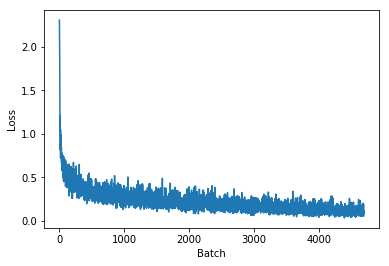

In [13]:
plt.plot(range(1, 4691), history.losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()

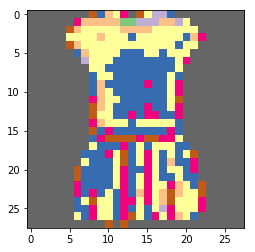

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
x_train.shape
plt.imshow(1-x_train[3][:, :, 0], cmap='Accent')